# Etica y Seguridad de Datos - Proyecto Final

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("datafinal.csv")
data.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,First,Last,Phone,Ccnumber,Address,Country,Email
0,Male,57,1,1,2.0,No,2630.0,26.0,36,0,Edwin,Castillo,(412) 532-3071,6375508819454279,716 Kuchu Grove,EH,vifma@malac.it
1,Female,23,1,1,1.0,Yes,33053.0,152.0,66,0,Jay,Simpson,(324) 235-5322,5468218154515383,468 Tube Loop,CH,nur@kegumi.ai
2,Female,47,1,1,2.0,No,35804.0,124.0,150,0,Willie,Bowman,(640) 936-5852,4903855020206477,271 Ecgek Key,AL,ohehuc@damow.mx
3,Male,27,1,1,1.0,No,39874.0,152.0,27,0,Lillian,Parsons,(864) 621-4575,349976912136984,1059 Pivsog Lane,ZW,wegev@nohosu.ga
4,Female,47,1,0,2.0,Yes,38933.0,156.0,186,0,Carrie,Cooper,(586) 867-8845,3528302763283717,431 Nosvid Glen,PR,saw@zevjad.sm


Contamos con estas variables

In [4]:
for col in data.columns:
    print(col, end=", ")

Gender, Age, Driving_License, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response, First, Last, Phone, Ccnumber, Address, Country, Email, 

Clasificamos los datos que tenemos segun sus diferentes tipos:

# Datos Identificables: DROP
- First 
- Last
- Phone
- Email
# Datos Casi Identificables: KEEP
- Age 
- Gender
- Country
- Previously_Insured
- Vehicle_Age 
- Vehicle_Damage
- Vintage
- Response
- Driving_License
- address 
- Policy_Sales_Channel
# Datos Sensibles:
- CCNumber
- Annual_Premium

Cuales son las decisiones a tomar?

- Droppear los datos identificables, pues estos solo ponen en riesgo y facilitan la identificación de un cliente en particular.

- Mantener los datos casi identificables y sensibles para un análisis próximo, pues son estos los que nos permitirán, en su mayoría, retener la mayor información útil para el análisis a realizar.


In [5]:
datacopy = data.copy()
datacopy.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,First,Last,Phone,Ccnumber,Address,Country,Email
0,Male,57,1,1,2.0,No,2630.0,26.0,36,0,Edwin,Castillo,(412) 532-3071,6375508819454279,716 Kuchu Grove,EH,vifma@malac.it
1,Female,23,1,1,1.0,Yes,33053.0,152.0,66,0,Jay,Simpson,(324) 235-5322,5468218154515383,468 Tube Loop,CH,nur@kegumi.ai
2,Female,47,1,1,2.0,No,35804.0,124.0,150,0,Willie,Bowman,(640) 936-5852,4903855020206477,271 Ecgek Key,AL,ohehuc@damow.mx
3,Male,27,1,1,1.0,No,39874.0,152.0,27,0,Lillian,Parsons,(864) 621-4575,349976912136984,1059 Pivsog Lane,ZW,wegev@nohosu.ga
4,Female,47,1,0,2.0,Yes,38933.0,156.0,186,0,Carrie,Cooper,(586) 867-8845,3528302763283717,431 Nosvid Glen,PR,saw@zevjad.sm


In [6]:
datacopy.drop(['First','Last','Phone','Email'], axis=1, inplace=True)


In [7]:
datacopy.head(5)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Ccnumber,Address,Country
0,Male,57,1,1,2.0,No,2630.0,26.0,36,0,6375508819454279,716 Kuchu Grove,EH
1,Female,23,1,1,1.0,Yes,33053.0,152.0,66,0,5468218154515383,468 Tube Loop,CH
2,Female,47,1,1,2.0,No,35804.0,124.0,150,0,4903855020206477,271 Ecgek Key,AL
3,Male,27,1,1,1.0,No,39874.0,152.0,27,0,349976912136984,1059 Pivsog Lane,ZW
4,Female,47,1,0,2.0,Yes,38933.0,156.0,186,0,3528302763283717,431 Nosvid Glen,PR


In [8]:
from pycanon import anonymity, report

Recordando los datos que planteamos analizar de aquí en adelante

# Casi Identificables: KEEP
- Age 
- Gender
- Country
- Previously_Insured
- Vehicle_Age 
- Vehicle_Damage
- Vintage
- Response
- Driving_License
- address 
- Policy_Sales_Channel
# Sensibles: KEEP
- CCNumber
- Annual_Premium

In [9]:
datacopy.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response', 'Ccnumber', 'Address', 'Country'],
      dtype='object')

In [10]:
QI = ['Age','Gender','Country','Vehicle_Age','Address','Policy_Sales_Channel']
SA = ['Ccnumber','Annual_Premium']

In [11]:
datacopy.head(5)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Ccnumber,Address,Country
0,Male,57,1,1,2.0,No,2630.0,26.0,36,0,6375508819454279,716 Kuchu Grove,EH
1,Female,23,1,1,1.0,Yes,33053.0,152.0,66,0,5468218154515383,468 Tube Loop,CH
2,Female,47,1,1,2.0,No,35804.0,124.0,150,0,4903855020206477,271 Ecgek Key,AL
3,Male,27,1,1,1.0,No,39874.0,152.0,27,0,349976912136984,1059 Pivsog Lane,ZW
4,Female,47,1,0,2.0,Yes,38933.0,156.0,186,0,3528302763283717,431 Nosvid Glen,PR


Cambiamos los tipos de datos

In [12]:
datacopy['Age'] = datacopy['Age'].astype('int16')
datacopy['Driving_License'] = datacopy['Driving_License'].astype('bool')
datacopy['Previously_Insured'] = datacopy['Previously_Insured'].astype('bool')
datacopy['Vintage'] = datacopy['Vintage'].astype('bool')
datacopy['Vehicle_Damage'] = datacopy['Vehicle_Damage'].astype('bool')
datacopy['Response'] = datacopy['Response'].astype('bool')
datacopy['Policy_Sales_Channel'] = (datacopy['Policy_Sales_Channel']).astype(int).astype(str)
datacopy['Vehicle_Age'] = datacopy['Vehicle_Age'].astype('int16')
datacopy['Annual_Premium'] = datacopy['Annual_Premium'].astype('int64')
datacopy['Ccnumber'] = datacopy['Ccnumber'].astype('str')

In [13]:
datacopy.dtypes

Gender                  object
Age                      int16
Driving_License           bool
Previously_Insured        bool
Vehicle_Age              int16
Vehicle_Damage            bool
Annual_Premium           int64
Policy_Sales_Channel    object
Vintage                   bool
Response                  bool
Ccnumber                object
Address                 object
Country                 object
dtype: object

Verificamos data booleana y que tanto nos sirve para el analisis

In [14]:
datacopy[['Driving_License','Previously_Insured','Vehicle_Damage','Vintage','Response']]

,Driving_License,Previously_Insured,Vehicle_Damage,Vintage,Response
0,True,True,True,True,False
1,True,True,True,True,False
2,True,True,True,True,False
3,True,True,True,True,False
4,True,False,True,True,False
...,...,...,...,...,...
381104,True,False,True,True,False
381105,True,False,True,True,True
381106,True,True,True,True,False
381107,True,False,True,True,True


In [15]:
datacopy[['Driving_License','Previously_Insured','Vehicle_Damage','Vintage','Response']].value_counts()

Driving_License  Previously_Insured  Vehicle_Damage  Vintage  Response
True             True                True            True     False       174229
                 False               True            True     False       159399
                                                              True         46511
False            False               True            True     False          530
                 True                True            True     False          241
True             True                True            True     True           158
False            False               True            True     True            41
dtype: int64

In [16]:
datacopy.drop(['Driving_License','Previously_Insured','Vehicle_Damage','Vintage','Response'],axis=1,inplace=True)

A falta de tecnicas de anonimizacion de data booleana lo droppeamos

In [17]:
datacopy.head(10)

,Gender,Age,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Ccnumber,Address,Country
0,Male,57,2,2630,26,6375508819454279,716 Kuchu Grove,EH
1,Female,23,1,33053,152,5468218154515383,468 Tube Loop,CH
2,Female,47,2,35804,124,4903855020206477,271 Ecgek Key,AL
3,Male,27,1,39874,152,349976912136984,1059 Pivsog Lane,ZW
4,Female,47,2,38933,156,3528302763283717,431 Nosvid Glen,PR
5,Male,24,1,35953,152,6291266469094991,1728 Hekka Way,FR
6,Male,46,2,40351,124,6304333700021079,1744 Wopi Square,FI
7,Male,56,6,35973,13,6334820291146251,583 Gafta Highway,TL
8,Female,61,2,38039,124,5165131194360486,1246 Niju Circle,TA
9,Male,66,2,2630,124,5104432148050775,281 Ehjo Pass,VG


## Policy Sales Channel

Si es:

de tipo * 0 * es Ventas en Persona

de tipo * 1 * es Ventas en Línea

de tipo * 2 * es Ventas por Teléfono

de tipo * 3 * es Ventas por Correo Electrónico

de tipo * 4 * es Redes Sociales

de tipo * 5 * es Alianzas Empresariales

de tipo * 6 * es Ventas a Través de Aplicaciones Móviles

de tipo * 7 * es Eventos Especiales

de tipo * 8 * es Ventas a Través de Agentes Independientes

de tipo * 9 * es Programas de Referidos

Dado que tenemos mucho posibles canales de ventas, queremos quedarnos con su codigo de identificacion intermedio. Por esa razon, para evitar ser muy especificos, decidimos enmascarar el primer y ultimo digito sobre el codigo asignado a cada canal de venta de seguros.

In [18]:
print("La menor longitud de codigo de canal de venta de seguro vehicular es de ", datacopy['Policy_Sales_Channel'].apply(len).min())

La menor longitud de codigo de canal de venta de seguro vehicular es de  1


In [19]:
print("La menor longitud de codigo de canal de venta de seguro vehicular es de ", datacopy['Policy_Sales_Channel'].apply(len).max()) 

La menor longitud de codigo de canal de venta de seguro vehicular es de  3


Podemos observar el histograma de datos antes de generalizar los valores, por lo que si se conocía el canal de ventas en específico de una de esas presonas, sería muy fácil ubicar el resto de sus datos.

In [20]:
datacopy['Policy_Sales_Channel'].value_counts()

152    134784
26      79700
124     73995
160     21779
156     10661
        ...  
41          1
143         1
149         1
84          1
123         1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

<Axes: >

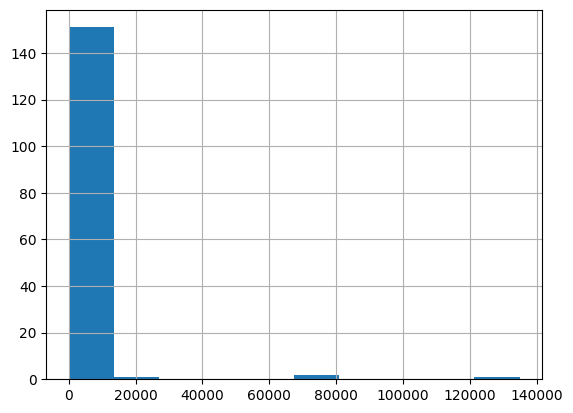

In [21]:
datacopy['Policy_Sales_Channel'].value_counts().hist()

Por esa razón, estandarizamos los valores para que puedan ubicarse en valores de longitud 3

In [22]:
datacopy['Policy_Sales_Channel'] = datacopy['Policy_Sales_Channel'].apply(lambda r : r.zfill(3))
datacopy['Policy_Sales_Channel'] = datacopy['Policy_Sales_Channel'].apply(lambda x: '*{}*'.format(x[1]))

Ahora, ya tenemos valores que evitan que se pueda detectar a una persona de manera precisa.

In [23]:
datacopy['Policy_Sales_Channel'].value_counts()

*2*    170157
*5*    167374
*6*     25973
*1*      7047
*0*      5812
*3*      3228
*4*       971
*9*       348
*8*       140
*7*        59
Name: Policy_Sales_Channel, dtype: int64

<Axes: >

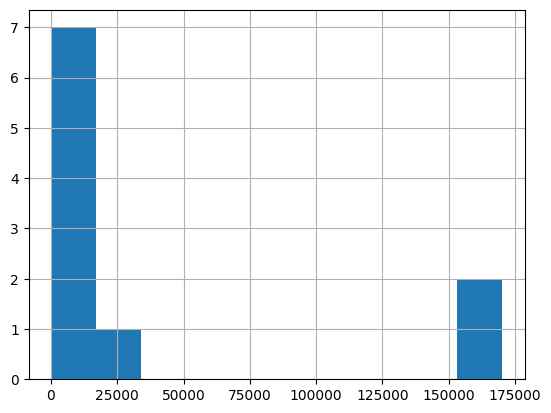

In [24]:
datacopy['Policy_Sales_Channel'].value_counts().hist()

## Address

Observando la distribución de valores de Address, nos encontramos con que había una gran cantida de valores únicos

In [25]:
datacopy['Address'].value_counts()

1526 Dovu Center       2
236 Ocpo Way           2
1430 Ohco Glen         2
869 Hizil Drive        2
810 Dejos Ridge        2
                      ..
1352 Otiv Park         1
1528 Ombaz Junction    1
1212 Facko View        1
1481 Fitop Way         1
1273 Egoku Avenue      1
Name: Address, Length: 381104, dtype: int64

Decidimos reducir la especificidad del Address quedándonos solo con el segundo y tercer valor de la dirección, sin embargo aún seguíamos teniendo gran presencia de valores únicos

In [26]:
datacopy['Address'] = datacopy['Address'].apply(lambda x: (x.split()[1]+' '+x.split()[2]))

In [27]:
datacopy['Address'].value_counts()

Dofo Lane        5
Ruwa River       4
Bowa Turnpike    4
Lona Pike        4
Taka River       4
                ..
Datez Way        1
Suvdih Pass      1
Vupi Parkway     1
Pirid Avenue     1
Egoku Avenue     1
Name: Address, Length: 373377, dtype: int64

In [28]:
perc_unique = round(366057/373377*100, 2)
perc_unique

98.04

Vemos acá, que EL 98% de la data son valores únicos! Lo que representa un gran problema

In [29]:
datacopy['Address'].value_counts().value_counts()

1    366057
2      6927
3       375
4        17
5         1
Name: Address, dtype: int64

In [30]:
datacopy.head(5)

,Gender,Age,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Ccnumber,Address,Country
0,Male,57,2,2630,*2*,6375508819454279,Kuchu Grove,EH
1,Female,23,1,33053,*5*,5468218154515383,Tube Loop,CH
2,Female,47,2,35804,*2*,4903855020206477,Ecgek Key,AL
3,Male,27,1,39874,*5*,349976912136984,Pivsog Lane,ZW
4,Female,47,2,38933,*5*,3528302763283717,Nosvid Glen,PR


Lo que queremos hacer, por esa razon, 

## Vehicle Age

In [31]:
datacopy['Vehicle_Age'].value_counts()

2    200316
1    164786
5      4008
6      3962
4      3938
3      2088
7      2011
Name: Vehicle_Age, dtype: int64

Por la parte de la edad no hay mucho problema, pero decidimos renombrar las variables para un mejor entendimiento de las variables:
- 1-3 años es considerado un Vehículo Casi Nuevo
- 4-5 años es considerado un Vehículo Desgastado
- 6-7 años es considerado un Vehículo Deplorable



In [32]:
age_mapping = {1: 'Casi Nuevo', 2: 'Casi Nuevo', 3: 'Casi Nuevo',
               4: 'Desgastado', 5: 'Desgastado',
               6: 'Deplorable', 7: 'Deplorable'}

datacopy["Vehicle_Age_Cat"] = datacopy['Vehicle_Age'].replace(age_mapping)

In [33]:
datacopy


,Gender,Age,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Ccnumber,Address,Country,Vehicle_Age_Cat
0,Male,57,2,2630,*2*,6375508819454279,Kuchu Grove,EH,Casi Nuevo
1,Female,23,1,33053,*5*,5468218154515383,Tube Loop,CH,Casi Nuevo
2,Female,47,2,35804,*2*,4903855020206477,Ecgek Key,AL,Casi Nuevo
3,Male,27,1,39874,*5*,349976912136984,Pivsog Lane,ZW,Casi Nuevo
4,Female,47,2,38933,*5*,3528302763283717,Nosvid Glen,PR,Casi Nuevo
...,...,...,...,...,...,...,...,...,...
381104,Female,57,2,2630,*5*,201430927663571,Reniku Street,SC,Casi Nuevo
381105,Male,65,2,2630,*2*,5170330091208391,Feha Glen,GT,Casi Nuevo
381106,Male,27,1,26144,*5*,30041617114838,Kikcod Loop,GW,Casi Nuevo
381107,Male,56,2,2630,*5*,5134839279775992,Jogo Drive,CA,Casi Nuevo


In [34]:
datacopy

,Gender,Age,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Ccnumber,Address,Country,Vehicle_Age_Cat
0,Male,57,2,2630,*2*,6375508819454279,Kuchu Grove,EH,Casi Nuevo
1,Female,23,1,33053,*5*,5468218154515383,Tube Loop,CH,Casi Nuevo
2,Female,47,2,35804,*2*,4903855020206477,Ecgek Key,AL,Casi Nuevo
3,Male,27,1,39874,*5*,349976912136984,Pivsog Lane,ZW,Casi Nuevo
4,Female,47,2,38933,*5*,3528302763283717,Nosvid Glen,PR,Casi Nuevo
...,...,...,...,...,...,...,...,...,...
381104,Female,57,2,2630,*5*,201430927663571,Reniku Street,SC,Casi Nuevo
381105,Male,65,2,2630,*2*,5170330091208391,Feha Glen,GT,Casi Nuevo
381106,Male,27,1,26144,*5*,30041617114838,Kikcod Loop,GW,Casi Nuevo
381107,Male,56,2,2630,*5*,5134839279775992,Jogo Drive,CA,Casi Nuevo


In [35]:
datacopy.Vehicle_Age_Cat.unique()

array(['Casi Nuevo', 'Deplorable', 'Desgastado'], dtype=object)

In [36]:
datacopy.columns

Index(['Gender', 'Age', 'Vehicle_Age', 'Annual_Premium',
       'Policy_Sales_Channel', 'Ccnumber', 'Address', 'Country',
       'Vehicle_Age_Cat'],
      dtype='object')

## Age

Respecto a la edad, tenemos una cantidad de valores variados, sin embargo, si tratamos de observar que tan variados son los valores tomando en cuenta la Edad

In [37]:
datacopy[['Age','Vehicle_Age_Cat','Policy_Sales_Channel']].value_counts()

Age  Vehicle_Age_Cat  Policy_Sales_Channel
24   Casi Nuevo       *5*                     23607
23   Casi Nuevo       *5*                     20820
25   Casi Nuevo       *5*                     18624
22   Casi Nuevo       *5*                     17655
26   Casi Nuevo       *5*                     11948
                                              ...  
61   Deplorable       *4*                         1
35   Casi Nuevo       *7*                         1
47   Desgastado       *4*                         1
61   Deplorable       *0*                         1
69   Casi Nuevo       *7*                         1
Length: 1156, dtype: int64

In [38]:
print("La edad minima en el dataset es ", datacopy["Age"].min())
print("La edad maxima en el dataset es ", datacopy["Age"].max())

La edad minima en el dataset es  20
La edad maxima en el dataset es  85


In [39]:
# Define los límites de los intervalos
bins = [19, 30, 40, 50, 60, 70, 80, 86]

# Define las etiquetas para cada intervalo
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-85']

# Utiliza la función cut para agrupar las edades y asignar las etiquetas
datacopy['Age'] = pd.cut(datacopy['Age'], bins=bins, labels=labels, include_lowest=True, right=False)


In [40]:
datacopy

,Gender,Age,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Ccnumber,Address,Country,Vehicle_Age_Cat
0,Male,50-59,2,2630,*2*,6375508819454279,Kuchu Grove,EH,Casi Nuevo
1,Female,20-29,1,33053,*5*,5468218154515383,Tube Loop,CH,Casi Nuevo
2,Female,40-49,2,35804,*2*,4903855020206477,Ecgek Key,AL,Casi Nuevo
3,Male,20-29,1,39874,*5*,349976912136984,Pivsog Lane,ZW,Casi Nuevo
4,Female,40-49,2,38933,*5*,3528302763283717,Nosvid Glen,PR,Casi Nuevo
...,...,...,...,...,...,...,...,...,...
381104,Female,50-59,2,2630,*5*,201430927663571,Reniku Street,SC,Casi Nuevo
381105,Male,60-69,2,2630,*2*,5170330091208391,Feha Glen,GT,Casi Nuevo
381106,Male,20-29,1,26144,*5*,30041617114838,Kikcod Loop,GW,Casi Nuevo
381107,Male,50-59,2,2630,*5*,5134839279775992,Jogo Drive,CA,Casi Nuevo


Revisando la cantidad de valores unicos, son muy pocos en comparacion con el resto del dataset, el cual tiene un tamaño aproximado de 380k registros. Por esa razón que elegimos droppearlos

In [41]:
data_filtro = datacopy[['Age','Vehicle_Age_Cat','Policy_Sales_Channel']].value_counts().reset_index()

data_filtro.columns = ['Age', 'Vehicle_Age_Cat', 'Policy_Sales_Channel', "cant_registros"]

In [42]:
cat_edad = data_filtro["Age"]
vehicle_age = data_filtro["Vehicle_Age_Cat"]
policy = data_filtro["Policy_Sales_Channel"]

In [43]:
data_search = data_filtro[data_filtro["cant_registros"] == 1][["Age", "Vehicle_Age_Cat", "Policy_Sales_Channel"]]

In [44]:
datacopy[['Age','Vehicle_Age_Cat','Policy_Sales_Channel']].value_counts().value_counts().reset_index().sort_values("index")

,index,0
0,1,17
2,2,5
9,3,4
8,4,4
7,5,4
...,...,...
71,23419,1
72,25608,1
73,34415,1
44,56945,1


In [45]:
datacopy.Age.value_counts()

20-29    155203
40-49     76846
30-39     54253
50-59     48034
60-69     29023
70-79     16712
80-85      1038
Name: Age, dtype: int64

## CCNumber

Aqui queremos encriptar en backend, pero al momento de mostrar en frontend que se muestre asi!

In [46]:
import random

In [47]:
def estandarizar_ccnumber(cc):
    cc = ''.join(c for c in str(cc) if c.isdigit())
    
    if len(cc) < 16:
        cc += ''.join(str(random.randint(0, 9)) for _ in range(16 - len(cc)))
    elif len(cc) > 16:
        cc = cc[:16]
    
    return cc

datacopy['Ccnumber'] = datacopy['Ccnumber'].apply(estandarizar_ccnumber)

In [48]:
datacopy

,Gender,Age,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Ccnumber,Address,Country,Vehicle_Age_Cat
0,Male,50-59,2,2630,*2*,6375508819454279,Kuchu Grove,EH,Casi Nuevo
1,Female,20-29,1,33053,*5*,5468218154515383,Tube Loop,CH,Casi Nuevo
2,Female,40-49,2,35804,*2*,4903855020206477,Ecgek Key,AL,Casi Nuevo
3,Male,20-29,1,39874,*5*,3499769121369847,Pivsog Lane,ZW,Casi Nuevo
4,Female,40-49,2,38933,*5*,3528302763283717,Nosvid Glen,PR,Casi Nuevo
...,...,...,...,...,...,...,...,...,...
381104,Female,50-59,2,2630,*5*,2014309276635712,Reniku Street,SC,Casi Nuevo
381105,Male,60-69,2,2630,*2*,5170330091208391,Feha Glen,GT,Casi Nuevo
381106,Male,20-29,1,26144,*5*,3004161711483843,Kikcod Loop,GW,Casi Nuevo
381107,Male,50-59,2,2630,*5*,5134839279775992,Jogo Drive,CA,Casi Nuevo


In [49]:
def estandarizar_enmascarar_ccnumber(cc):
    cc = ''.join(c for c in str(cc) if c.isdigit())
    
    if len(cc) < 16:
        cc += ''.join(str(random.randint(0, 9)) for _ in range(16 - len(cc)))
    elif len(cc) > 16:
        cc = cc[:16]
    
    cc = cc[:4] + '*' * 8 + cc[12:] # + '*' * 4
    
    return cc

datacopy['Ccnumber'] = datacopy['Ccnumber'].apply(estandarizar_enmascarar_ccnumber)

In [50]:
datacopy

,Gender,Age,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Ccnumber,Address,Country,Vehicle_Age_Cat
0,Male,50-59,2,2630,*2*,6375********4279,Kuchu Grove,EH,Casi Nuevo
1,Female,20-29,1,33053,*5*,5468********5383,Tube Loop,CH,Casi Nuevo
2,Female,40-49,2,35804,*2*,4903********6477,Ecgek Key,AL,Casi Nuevo
3,Male,20-29,1,39874,*5*,3499********9847,Pivsog Lane,ZW,Casi Nuevo
4,Female,40-49,2,38933,*5*,3528********3717,Nosvid Glen,PR,Casi Nuevo
...,...,...,...,...,...,...,...,...,...
381104,Female,50-59,2,2630,*5*,2014********5712,Reniku Street,SC,Casi Nuevo
381105,Male,60-69,2,2630,*2*,5170********8391,Feha Glen,GT,Casi Nuevo
381106,Male,20-29,1,26144,*5*,3004********3843,Kikcod Loop,GW,Casi Nuevo
381107,Male,50-59,2,2630,*5*,5134********5992,Jogo Drive,CA,Casi Nuevo


## Planes a futuro

Address reemplazar con zipcodes aleatorios y luego enmascarar con *****

In [51]:
datacopy['Country'].value_counts()

US    3045
FK    1596
KH    1590
SG    1589
AM    1588
      ... 
ER    1424
AF    1424
CY    1411
BA    1410
GB    1409
Name: Country, Length: 252, dtype: int64

In [52]:
#Los originales

QI = ['Age','Gender','Country','Vehicle_Age','Address','Policy_Sales_Channel']
SA = ['Ccnumber','Annual_Premium']

In [56]:
QI = ['Age','Vehicle_Age','Policy_Sales_Channel']
SA = ['Ccnumber','Annual_Premium']

In [55]:
datacopy[['Age','Country','Vehicle_Age_Cat','Policy_Sales_Channel']].value_counts()

Age    Country  Vehicle_Age_Cat  Policy_Sales_Channel
20-29  US       Casi Nuevo       *5*                     1006
       SO       Casi Nuevo       *5*                      561
       IC       Casi Nuevo       *5*                      549
       GL       Casi Nuevo       *5*                      546
       SE       Casi Nuevo       *5*                      541
                                                         ... 
50-59  LV       Desgastado       *5*                        1
                Deplorable       *0*                        1
       LU       Desgastado       *1*                        1
                Deplorable       *0*                        1
80-85  ZW       Casi Nuevo       *2*                        1
Length: 14214, dtype: int64

In [59]:
datacopy[['Age','Country','Vehicle_Age_Cat','Policy_Sales_Channel']].value_counts().value_counts()

1      4127
2      1749
3      1253
4       975
5       830
       ... 
256       1
259       1
263       1
265       1
160       1
Length: 318, dtype: int64

In [57]:
datacopy[['Age','Vehicle_Age','Policy_Sales_Channel']].value_counts()

Age    Vehicle_Age  Policy_Sales_Channel
20-29  1            *5*                     121896
40-49  2            *2*                      56350
50-59  2            *2*                      33892
30-39  2            *2*                      22775
20-29  1            *6*                      20600
                                             ...  
80-85  2            *4*                          1
50-59  5            *8*                          1
                    *7*                          1
80-85  2            *7*                          1
40-49  6            *7*                          1
Length: 319, dtype: int64

In [58]:
datacopy[['Age','Vehicle_Age','Policy_Sales_Channel']].value_counts().value_counts()

1      37
2      25
3      20
4      12
5      12
       ..
682     1
685     1
700     1
706     1
152     1
Length: 135, dtype: int64